In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib as rc
%matplotlib inline

In [2]:
text_foreigner = pd.read_csv("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt",sep="\t",\
                   encoding="cp949")
text_foreigner.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0


In [3]:
text_foreigner.columns = ['기준일자','구코드','행정동코드','업종코드','외국인 국가명','이용건수','이용금액']

In [4]:
text_foreigner.isna().sum()

기준일자       0
구코드        0
행정동코드      0
업종코드       0
외국인 국가명    0
이용건수       0
이용금액       3
dtype: int64

In [5]:
text_foreigner[text_foreigner["이용금액"].isna()==True].index

Int64Index([159857, 223832, 234647], dtype='int64')

In [6]:
print(text_foreigner.iloc[159857])
print(text_foreigner.iloc[223832])
print(text_foreigner.iloc[234647])

기준일자       20200422
구코드             140
행정동코드           540
업종코드             40
외국인 국가명          대만
이용건수              1
이용금액            NaN
Name: 159857, dtype: object
기준일자       20200527
구코드             140
행정동코드           540
업종코드             40
외국인 국가명          대만
이용건수              1
이용금액            NaN
Name: 223832, dtype: object
기준일자       20200423
구코드             140
행정동코드           540
업종코드             40
외국인 국가명          대만
이용건수              6
이용금액            NaN
Name: 234647, dtype: object


NaN 값 value 확인 후 의미없는 데이터 확인

In [7]:
# NaN값 드랍시켜준 후 인덱스 재배열
text_foreigner.drop(159857,0,inplace=True)
text_foreigner.drop(223832,0,inplace=True)
text_foreigner.drop(234647,0,inplace=True)
text_foreigner = text_foreigner.reset_index(drop=True)

In [8]:
# NAN값 확인
text_foreigner.isna().sum()

기준일자       0
구코드        0
행정동코드      0
업종코드       0
외국인 국가명    0
이용건수       0
이용금액       0
dtype: int64

필요에 따른 정의서 dict 타입(replace 사용) - foreigner 전용
1. 국가
a = {"네덜란드":0,"대만":1,"독일":2,"러시아":3,"미국":4,"미주":5,"베트남":6,"스웨덴":7,"싱가폴":8,"아시아":9,\
     "영국" : 10,"오스트레일리아":11,"유럽":12,"일본":13,"정보없음":14,"중국":15,"중동/아프리카":16,"카자흐스탄":17\
     ,"캐나다":18,"태국":19,"프랑스":20,"필리핀":21,"홍콩":22}
     
text_foreigner["외국인 국가명"].replace(a,inplace=True)


2. 구코드
b = {140: '서울 중구', 350: '서울 노원구', 260: '대구 수성구', 110: '대구 중구'}

text_foreigner["구코드"].replace(b,inplace=True)

3. 행정동 코드


4. 기준월
text_foreigner["기준월"] = pd.Series(map(lambda x:x//100,text_foreigner["기준일자"]))


5. 기준해
text_foreigner["기준해"] = pd.Series(map(lambda x:x//100,text_foreigner["기준월"]))


6. 월 단위 변환
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}

In [9]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0
...,...,...,...,...,...,...,...
238821,20200507,350,640,40,오스트레일리아,6,29.0
238822,20200512,350,612,40,오스트레일리아,3,15.0
238823,20200512,350,670,40,오스트레일리아,2,13.0
238824,20200516,350,640,71,오스트레일리아,1,39.0


In [10]:
text_foreigner

,기준일자,구코드,행정동코드,업종코드,외국인 국가명,이용건수,이용금액
0,20190204,260,510,81,대만,2,30.0
1,20190213,260,510,40,대만,2,32.0
2,20190416,260,510,40,대만,2,16.0
3,20190419,260,510,42,대만,3,610.0
4,20190308,260,510,10,대만,7,629.0
...,...,...,...,...,...,...,...
238821,20200507,350,640,40,오스트레일리아,6,29.0
238822,20200512,350,612,40,오스트레일리아,3,15.0
238823,20200512,350,670,40,오스트레일리아,2,13.0
238824,20200516,350,640,71,오스트레일리아,1,39.0


In [11]:
text_resident = pd.read_csv("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/02_카드매출데이터(신한카드)/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt",\
                            sep = "\t")

In [12]:
text_resident.columns = ['기준일자','구코드','행정동코드','업종코드','성별코드','나이코드','이용건수','이용금액']
text_resident

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194


필요에 따른 정의성 dict 타입 - resident 전용

1. 성별코드 전환
a = {"F":1,"M":0}
text_resident["성별코드"].replace(a,inplace=True)


2. 기준 월 추가
text_resident["기준월"] = pd.Series(map(lambda x : x// 100 , text_resident["기준일자"]))


3. 기준 해 추가
text_resident["기준해"] = pd.Series(map(lambda x : x// 100 , text_resident["기준월"]))

4. 월 단위 변환
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}

In [13]:
# 월단위 2019년 2020년 카드 이용금액 시각화(외국인)
text_foreigner["기준월"] = pd.Series(map(lambda x:x//100,text_foreigner["기준일자"]))
text_foreigner["기준해"] = pd.Series(map(lambda x:x//100,text_foreigner["기준월"]))

In [14]:
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}
temp = copy.copy(text_foreigner)
temp["기준월"].replace(c,inplace = True)

In [15]:
# 월단위 2019년 2020년 카드 이용금액 시각화(내국인)
text_resident["기준월"] = pd.Series(map(lambda x : x// 100 , text_resident["기준일자"]))
text_resident["기준해"] = pd.Series(map(lambda x : x// 100 , text_resident["기준월"]))
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}
temp2 = pd.DataFrame(text_resident)
temp2.replace(c,inplace = True)
temp2.head()

,기준일자,구코드,행정동코드,업종코드,성별코드,나이코드,이용건수,이용금액,기준월,기준해
0,20190201,110,517,10,F,25,11,595,2,2019
1,20190201,110,517,10,F,50,5,243,2,2019
2,20190201,110,517,10,F,55,5,27,2,2019
3,20190201,110,517,10,M,20,11,243,2,2019
4,20190201,110,517,10,M,25,11,433,2,2019


In [16]:
# 외국인 2019년 2020년 카드 이용 금액 비율
k = []
for i in range(2,6):
    a = temp.groupby(["기준해","기준월"])["이용금액"].sum().loc[2020,i] * 100 /\
    temp.groupby(["기준해","기준월"])["이용금액"].sum().loc[2019,i]
    k.append(a)
    print(i,"월 2019년 대비 2020년 소비 비율: {0:.2f}".format(a),"%")

2 월 2019년 대비 2020년 소비 비율: 51.91 %
3 월 2019년 대비 2020년 소비 비율: 5.08 %
4 월 2019년 대비 2020년 소비 비율: 4.05 %
5 월 2019년 대비 2020년 소비 비율: 4.43 %


In [17]:
# 내국인 2019년 2020년 카드 이용 금액 비율
t = []
for i in range(2,6):
    a = temp2.groupby(["기준해","기준월"])["이용금액"].sum().loc[2020,i] * 100 /\
    temp2.groupby(["기준해","기준월"])["이용금액"].sum().loc[2019,i]
    t.append(a)
    print(i,"월 2019년 대비 2020년 소비 비율: {0:.2f}".format(a),"%")

2 월 2019년 대비 2020년 소비 비율: 86.77 %
3 월 2019년 대비 2020년 소비 비율: 68.20 %
4 월 2019년 대비 2020년 소비 비율: 78.21 %
5 월 2019년 대비 2020년 소비 비율: 94.40 %


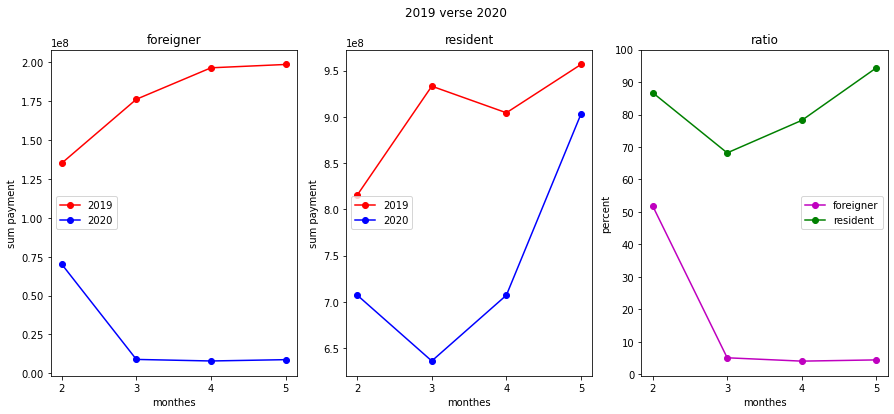

In [18]:
# 2019년과 2020년 월 단위 카드 이용금액 차이
fig = plt.figure()
fig.set_size_inches(15,6)
fig.suptitle("2019 verse 2020")
ax_1 = fig.add_subplot(1,3,1)
ax_2 = fig.add_subplot(1,3,2)
ax_3 = fig.add_subplot(1,3,3)
ax_1.plot(temp.groupby(["기준해","기준월"])["이용금액"].sum().loc[2019],marker = 'o',c="r",label="2019")
ax_1.plot(temp.groupby(["기준해","기준월"])["이용금액"].sum().loc[2020],marker = 'o',c="b",label="2020")
ax_1.legend(loc="center left")
ax_1.set_title("foreigner")
ax_1.set_xlabel("monthes")
ax_1.set_ylabel("sum payment")
ax_1.set_xticks([2,3,4,5])

ax_2.plot(temp2.groupby(["기준해","기준월"])["이용금액"].sum().loc[2019],marker = 'o',c="r",label="2019")
ax_2.plot(temp2.groupby(["기준해","기준월"])["이용금액"].sum().loc[2020],marker = 'o',c="b",label="2020")
ax_2.legend(loc="center left")
ax_2.set_title("resident")
ax_2.set_xlabel("monthes")
ax_2.set_ylabel("sum payment")
ax_2.set_xticks([2,3,4,5])


ax_3.set_title("ratio")
ax_3.plot([2,3,4,5],k,marker = 'o',c="m",label = "foreigner")
ax_3.plot([2,3,4,5],t,marker = 'o',c="g",label = "resident")
ax_3.set_title("ratio")
ax_3.set_xlabel("monthes")
ax_3.set_ylabel("percent")
ax_3.legend(loc="center right")
ax_3.set_xticks([2,3,4,5])
ax_3.set_yticks([0,10,20,30,40,50,60,70,80,90,100])


# 2019년과 2020년 월 단위 카드 이용금액 정리
외국인 카드 이용금액과 같은 경우, 3,4,5월달은 전년도 대비 사용 비율이 5%에 불과하다.

내국인 카드 이용금액과 같은 경우, 코로나 직후 2~3월달 감소하는 추세를 보이다가 다시 복구되는 모양을 볼 수 있다.

** 주의사항 **
- 외국인과 내국인 소비액의 y축 크기가 다름
- 5월달에 내국인 카드 사용금액이 급증하는 이유는 긴급재난지원금이 지급된 것 또한 충분히 고려해야 할 사항이다.

In [19]:
# 월 단위 각 구 별 평균 이용금액
b = {140: '서울 중구', 350: '서울 노원구', 260: '대구 수성구', 110: '대구 중구'}
text_foreigner["구코드"].replace(b,inplace=True)
temp3 = copy.copy(text_foreigner)
c = {201902:2,201903:3,201904:4,201905:5,202002:2,202003:3,202004:4,202005:5}
temp3.replace(c,inplace=True)
temp3 = pd.DataFrame(temp3.groupby(["구코드","기준해","기준월"])["이용금액"].sum())

In [20]:
Gu = [x for x in set(text_foreigner["구코드"].replace(b))]

# 외국인 지역구 별 2019,2020년 월 단위 카드 이용금액

In [21]:
cnt = 0
print("단위 : 천 원 , 외국인")
indx = np.array([2,3,4,5])
for i in range(4):
    for k in indx:
        a = int(temp3.loc[Gu[i],2020,k]) / int(temp3.loc[Gu[i],2019,k]) * 100
        print(Gu[i],"의",k,"월 : {0:.2f}".format(a),"%")
        cnt += 1
    print()

단위 : 천 원 , 외국인
서울 중구 의 2 월 : 51.52 %
서울 중구 의 3 월 : 4.92 %
서울 중구 의 4 월 : 3.86 %
서울 중구 의 5 월 : 3.90 %

서울 노원구 의 2 월 : 71.20 %
서울 노원구 의 3 월 : 29.83 %
서울 노원구 의 4 월 : 33.10 %
서울 노원구 의 5 월 : 40.60 %

대구 중구 의 2 월 : 67.44 %
대구 중구 의 3 월 : 5.85 %
대구 중구 의 4 월 : 4.95 %
대구 중구 의 5 월 : 17.70 %

대구 수성구 의 2 월 : 53.34 %
대구 수성구 의 3 월 : 11.30 %
대구 수성구 의 4 월 : 11.31 %
대구 수성구 의 5 월 : 24.10 %



# 내국인 지역구별 2019년,2020년 월 단위 카드 이용금액 합계의 비율

In [22]:
temp4 = copy.copy(text_resident)
temp4["구코드"].replace(b,inplace=True)
temp4["기준월"].replace(c,inplace=True)
temp4 = pd.DataFrame(temp4.groupby(["구코드","기준해","기준월"])["이용금액"].sum())
cnt = 0
print("단위 : 천 원, 내국인")
for i in range(4):
    for k in indx:
        a = float(temp4.loc[Gu[i],2020,k]) / float(temp4.loc[Gu[i],2019,k]) * 100
        print(Gu[i],"의",k,"월 : {0:.2f}".format(a),"%")
        cnt += 1
    print()

단위 : 천 원, 내국인
서울 중구 의 2 월 : 86.40 %
서울 중구 의 3 월 : 71.35 %
서울 중구 의 4 월 : 78.88 %
서울 중구 의 5 월 : 93.16 %

서울 노원구 의 2 월 : 94.66 %
서울 노원구 의 3 월 : 78.81 %
서울 노원구 의 4 월 : 87.53 %
서울 노원구 의 5 월 : 103.96 %

대구 중구 의 2 월 : 74.69 %
대구 중구 의 3 월 : 46.05 %
대구 중구 의 4 월 : 65.62 %
대구 중구 의 5 월 : 85.96 %

대구 수성구 의 2 월 : 88.24 %
대구 수성구 의 3 월 : 64.84 %
대구 수성구 의 4 월 : 74.76 %
대구 수성구 의 5 월 : 92.57 %



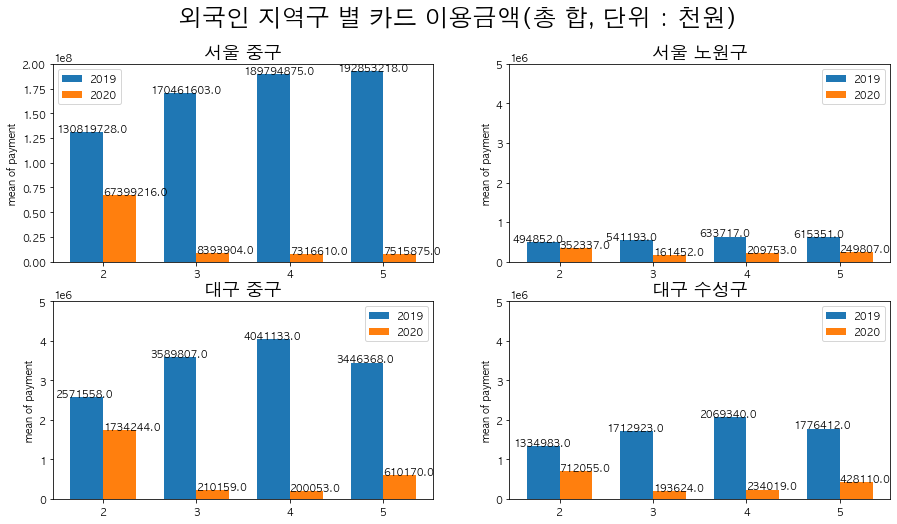

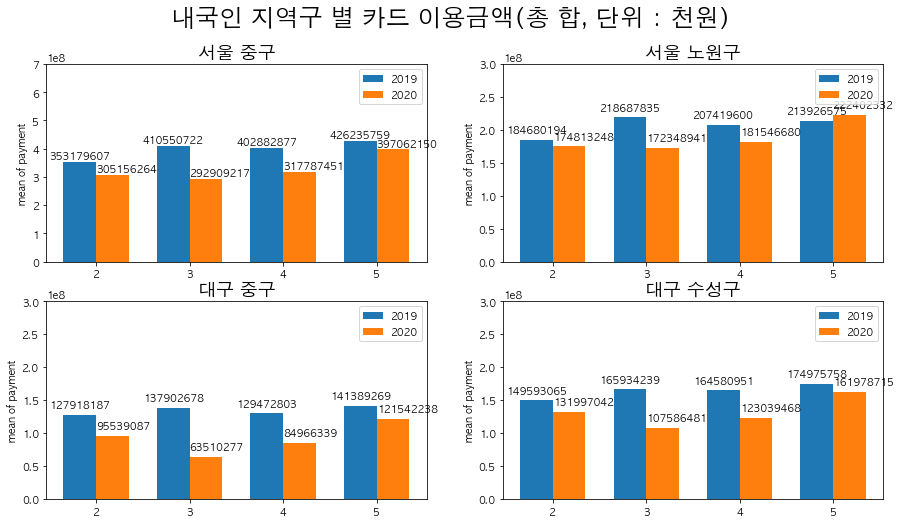

In [23]:
plt.rc('font', family='AppleGothic')
fig = plt.figure(figsize=(15,8))
bar_width = 0.35
cnt = 1
fig.suptitle("외국인 지역구 별 카드 이용금액(총 합, 단위 : 천원)",fontsize= 24)
for i in Gu:
    i = fig.add_subplot(2,2,cnt)
    i.bar(indx-bar_width/2,temp3.loc[Gu[cnt-1],2019]["이용금액"].to_list(),bar_width,label="2019")
    i.bar(indx+bar_width/2,temp3.loc[Gu[cnt-1],2020]["이용금액"].to_list(),bar_width,label="2020")
    i.set_title(Gu[cnt-1],fontsize=18)
    i.legend(loc = "best")
    i.set_ylabel("mean of payment")
    i.set_xticks([2,3,4,5])
    a = [x for x in temp3.loc[Gu[cnt-1],2019]["이용금액"]]
    b = [x for x in temp3.loc[Gu[cnt-1],2020]["이용금액"]]
    for k,v in enumerate(a):
        i.text(k+1.5,v,str(v),color = 'black',fontweight = 'bold')
    for k,v in enumerate(b):
        i.text(k+2,v,str(v),color = 'black',fontweight = 'bold')
    if Gu[cnt-1] == "서울 중구":
        i.set_ylim([0,200000000])
    else:
        i.set_ylim([0,5000000])
    cnt += 1
    

fig = plt.figure(figsize = (15,8))
cnt = 1
fig.suptitle("내국인 지역구 별 카드 이용금액(총 합, 단위 : 천원)",fontsize = 24)
for i in Gu:
    i = fig.add_subplot(2,2,cnt)
    i.bar(indx-bar_width/2,temp4.loc[Gu[cnt-1],2019]["이용금액"].to_list(),bar_width,label = "2019")
    i.bar(indx+bar_width/2,temp4.loc[Gu[cnt-1],2020]["이용금액"].to_list(),bar_width,label = "2020")
    a = [x for x in list(temp4.loc[Gu[cnt-1],2019]["이용금액"])]
    b = [x for x in list(temp4.loc[Gu[cnt-1],2020]["이용금액"])]
    i.set_title(Gu[cnt-1],fontsize = 18)
    i.legend(loc = "best")
    i.set_ylabel("mean of payment")
    i.set_xticks([2,3,4,5])
    i.set_ylim(0,300000000)
    for k,v in enumerate(a):
        i.text(k+1.5 , v + 10000000, str(v), color='black', fontweight='bold')
    for k,v in enumerate(b):
        i.text(k+2 , v + 10000000, str(v), color='black', fontweight='bold')
    if Gu[cnt-1] == "서울 중구":
        i.set_ylim([0,700000000])
    else:
        i.set_ylim([0,300000000])
    cnt+=1

** 주의 사항
- 서울 중구는 y축 값이 다르고 나머지는 모두 같다.

In [26]:
# 2019년, 2020년 월 단위 업종별 이용금액 총합
text_Definition = pd.read_excel("/Users/jaeyoungcho/Desktop/2020빅콘테스트 문제데이터\
(혁신아이디어분야)/카드소비데이터(신한카드)_데이터정의서.xlsx",sheet_name=2,header=2)
del text_Definition["Unnamed: 0"]
text_Definition.columns = ["업종코드","세부 업종코드"]
a = [x for x in text_Definition["업종코드"]]
b = [x for x in text_Definition["업종코드"]]
for i in range(len(a)):
    if type(a[i]) == str:
        temp = int(a[i][-3:-1])
        a[i] = int(a[i][-3:-1])
    if type(a[i]) != str:
        a[i] = temp

for i in range(len(b)):
    if type(b[i]) == str:
        temp = b[i][0:-4]
        b[i] = b[i][0:-4]
    if type(b[i]) != str:
        b[i] = temp
dic = dict(zip(a,b))
dic

{10: '숙박',
 20: '레저용품',
 21: '레저업소',
 22: '문화취미',
 30: '가구',
 31: '전기',
 32: '주방용구',
 33: '연료판매',
 34: '광학제품',
 35: '가전',
 40: '유통업',
 42: '의복',
 43: '직물',
 44: '신변잡화',
 50: '서적문구',
 52: '사무통신',
 60: '자동차판매',
 62: '자동차정비',
 70: '의료기관',
 71: '보건위생',
 80: '요식업소',
 81: '음료식품',
 92: '수리서비스'}

In [27]:
temp_Findustry = copy.copy(text_foreigner)
temp_Findustry["업종코드"].replace(dic,inplace=True)
temp_Findustry["기준월"].replace(c,inplace=True)
tempF = pd.DataFrame(temp_Findustry.groupby(["기준해","기준월","업종코드"])["이용금액"].sum())
industry = [x for x in set(temp_Findustry["업종코드"])]
monthes = np.array([x for x in set(temp_Findustry["기준월"])])
years = [x for x in set(temp_Findustry["기준해"])]

In [28]:
tempF

이용금액
기준해  기준월 업종코드            
2019 2   가구       11817.0
         가전       31413.0
         광학제품     39687.0
         레저업소     85584.0
         레저용품   3869246.0
...                   ...
2020 5   자동차정비   183967.0
         자동차판매    16362.0
         전기         329.0
         주방용구      7806.0
         직물        2592.0

[181 rows x 1 columns]

In [31]:
tempF.loc[2019,2]

AttributeError: 'DataFrame' object has no attribute 'to_list'

AttributeError: 'DataFrame' object has no attribute 'to_list'

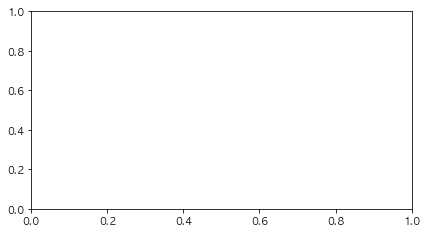

In [30]:
plt.rc('font',family = 'AppleGothic')
fig = plt.figure(figsize=(15,8))
bar_width = 0.35
cnt = 1
a = ["2월","3월","4월","5월"]
for i in a:
    for j in range(2,6):
        i = fig.add_subplot(2,2,cnt)
        i.bar(monthes-bar_width/2,tempF.loc[2019,j].to_list(),bar_width,label = 2019)
        i.bar(monthes-bar_width/2,tempF.loc[2020,j].to_list(),bar_width,label = 2020)
        cnt += 1

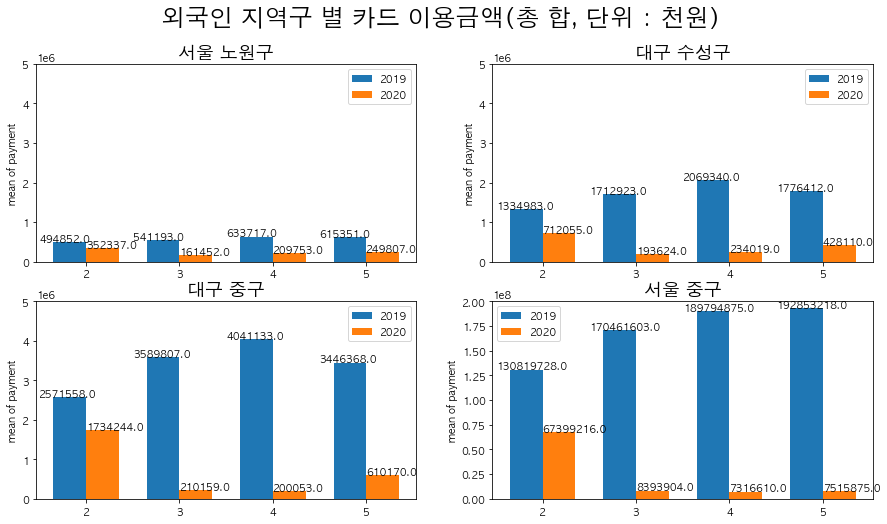

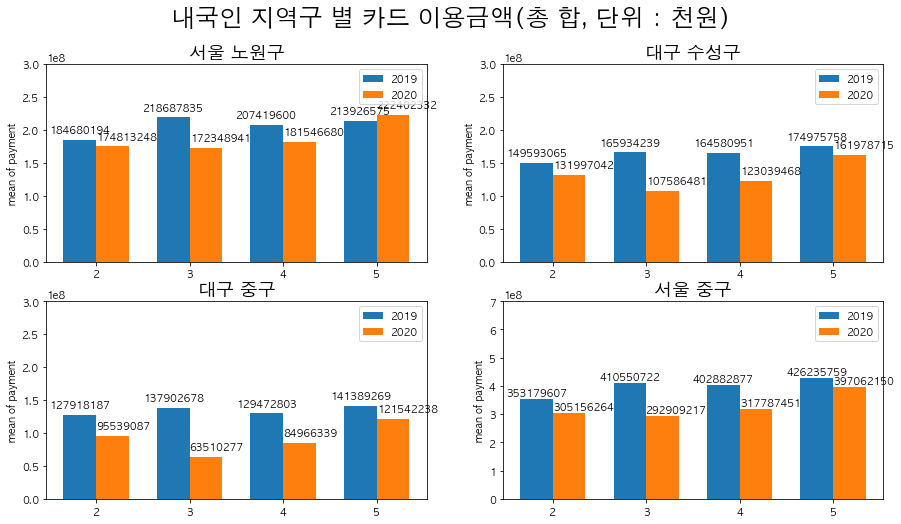

In [28]:
plt.rc('font', family='AppleGothic')
fig = plt.figure(figsize=(15,8))
bar_width = 0.35
cnt = 1
fig.suptitle("외국인 지역구 별 카드 이용금액(총 합, 단위 : 천원)",fontsize= 24)
for i in Gu:
    i = fig.add_subplot(2,2,cnt)
    i.bar(indx-bar_width/2,temp3.loc[Gu[cnt-1],2019]["이용금액"].to_list(),bar_width,label="2019")
    i.bar(indx+bar_width/2,temp3.loc[Gu[cnt-1],2020]["이용금액"].to_list(),bar_width,label="2020")
    i.set_title(Gu[cnt-1],fontsize=18)
    i.legend(loc = "best")
    i.set_ylabel("mean of payment")
    i.set_xticks([2,3,4,5])
    a = [x for x in temp3.loc[Gu[cnt-1],2019]["이용금액"]]
    b = [x for x in temp3.loc[Gu[cnt-1],2020]["이용금액"]]
    for k,v in enumerate(a):
        i.text(k+1.5,v,str(v),color = 'black',fontweight = 'bold')
    for k,v in enumerate(b):
        i.text(k+2,v,str(v),color = 'black',fontweight = 'bold')
    if Gu[cnt-1] == "서울 중구":
        i.set_ylim([0,200000000])
    else:
        i.set_ylim([0,5000000])
    cnt += 1
    

fig = plt.figure(figsize = (15,8))
cnt = 1
fig.suptitle("내국인 지역구 별 카드 이용금액(총 합, 단위 : 천원)",fontsize = 24)
for i in Gu:
    i = fig.add_subplot(2,2,cnt)
    i.bar(indx-bar_width/2,temp4.loc[Gu[cnt-1],2019]["이용금액"].to_list(),bar_width,label = "2019")
    i.bar(indx+bar_width/2,temp4.loc[Gu[cnt-1],2020]["이용금액"].to_list(),bar_width,label = "2020")
    a = [x for x in list(temp4.loc[Gu[cnt-1],2019]["이용금액"])]
    b = [x for x in list(temp4.loc[Gu[cnt-1],2020]["이용금액"])]
    i.set_title(Gu[cnt-1],fontsize = 18)
    i.legend(loc = "best")
    i.set_ylabel("mean of payment")
    i.set_xticks([2,3,4,5])
    i.set_ylim(0,300000000)
    for k,v in enumerate(a):
        i.text(k+1.5 , v + 10000000, str(v), color='black', fontweight='bold')
    for k,v in enumerate(b):
        i.text(k+2 , v + 10000000, str(v), color='black', fontweight='bold')
    if Gu[cnt-1] == "서울 중구":
        i.set_ylim([0,700000000])
    else:
        i.set_ylim([0,300000000])
    cnt+=1